In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [352]:
df=pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [353]:
X=df.replace({'Male':0, 'Female':1}).values[:,1:]

In [354]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)
X[:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918]])

## 1 - KMEANS

In [355]:
from sklearn.cluster import KMeans

In [356]:
ns=10
clus=np.zeros(ns)
for n in range(1, ns+1):
    km=KMeans(init = "k-means++", n_clusters =n, n_init = 12)
    km.fit(X)
    centers=km.cluster_centers_
    labels=km.labels_
    for i in range(len(centers)):
        msk=(labels==i)
        clus[n-1]+=np.sum((X[msk]-centers[i])**2)
    clus[n-1]/=n

In [303]:
# ns=10
# clus=np.zeros(ns)
# for n in range(1, ns+1):
#     km=KMeans(init='k-means++', n_clusters=n, n_init=12)
#     km.fit(X)
#     clus[n-1]=km.inertia_
# print(clus)

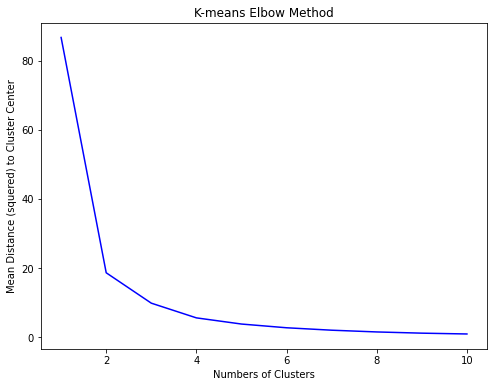

In [357]:
fig=plt.figure(figsize=(8,6))
plt.plot(np.arange(1,11),clus,'b')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Mean Distance (squered) to Cluster Center')
plt.title("K-means Elbow Method")
plt.show()

In [358]:
km=KMeans(init='k-means++',n_clusters=4, n_init=12)
km.fit(X)
centers=km.cluster_centers_
labels=km.labels_

In [359]:
df['label_']=labels
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label_
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,3
7,8,Female,23,18,94,1
8,9,Male,64,19,3,0
9,10,Female,30,19,72,1


In [360]:
df.label_.value_counts()

1    57
3    55
0    48
2    40
Name: label_, dtype: int64

In [361]:
df.groupby('label_').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
label_,,,,
0,104.958333,49.437500,62.416667,29.208333
1,100.210526,28.438596,59.666667,67.684211
2,103.375000,28.250000,62.000000,71.675000
3,94.818182,48.109091,58.818182,34.781818


In [362]:
groups=df.groupby(['label_','Gender']).mean()
groups

,,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
label_,Gender,,,,
0,Male,104.958333,49.437500,62.416667,29.208333
1,Female,100.210526,28.438596,59.666667,67.684211
2,Male,103.375000,28.250000,62.000000,71.675000
3,Female,94.818182,48.109091,58.818182,34.781818


In [363]:
def plot_individual_cluster(df, labels, technique_name):
    fig=plt.figure(figsize=(12,8))
    colors=plt.cm.Spectral(np.linspace(0,1, len(set(labels))))
    for l, c in zip(set(labels), colors):
        subset=df[labels==l]
        for i in subset.index:
            plt.text(subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i],subset['CustomerID'][i], rotation=25)
        plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'], c=c, s=subset['Age'], label='Cluster'+str(l))
    plt.legend()
    plt.margins(0.1)
    plt.xlabel('Score')
    plt.ylabel('Income')
    plt.title("Clustering with "+technique_name)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

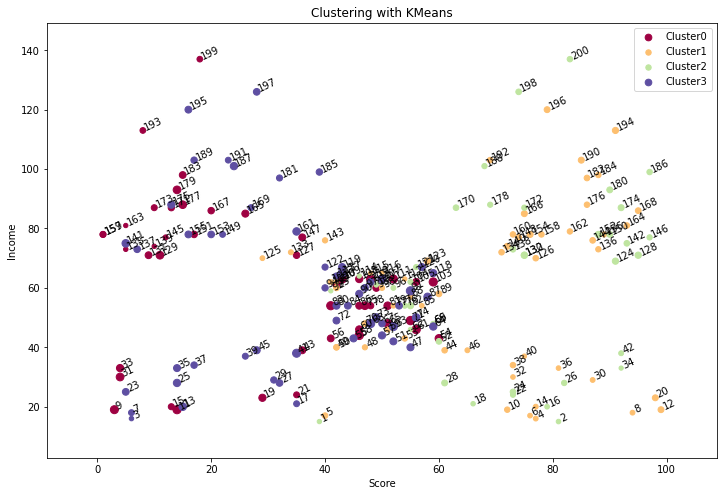

In [364]:
plot_individual_cluster(df, labels, 'KMeans')

In [365]:
def plot_group_cluster(groups,labels):
    fig=plt.figure(figsize=(8, 5))
    colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))

    for l, c in zip(set(labels), colors):
        subset=groups.loc[(l,),]

        for i in subset.index:
            plt.text(subset.loc[i,'Spending Score (1-100)']+2,subset.loc[i,'Annual Income (k$)'], 'Gender: '+i)
        plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'], c=c, 
                    s=subset['Age']*10, label='Cluster'+str(l))
    plt.legend(loc='lower left')
    plt.margins(0.3)
    plt.xlabel('Score')
    plt.ylabel('Income')
    plt.title("Clusters")
    plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

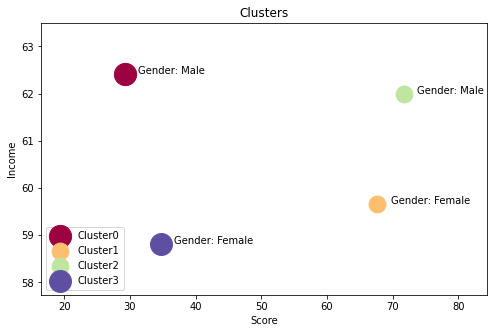

In [366]:
plot_group_cluster(groups, labels)

In [367]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.3641657522339062

## 2 - HIERARCHICAL

In [368]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

In [369]:
dis=distance_matrix(X,X)
Z=hierarchy.linkage(dis, 'average')

C:\Users\pc\AppData\Local\Temp\ipykernel_4652\3603775334.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(dis, 'average')


In [370]:
def llf(id):
    return F"[{df['Gender'][id]} {df['Age'][id]} {df['Annual Income (k$)'][id]} {df['Spending Score (1-100)'][id]}]"

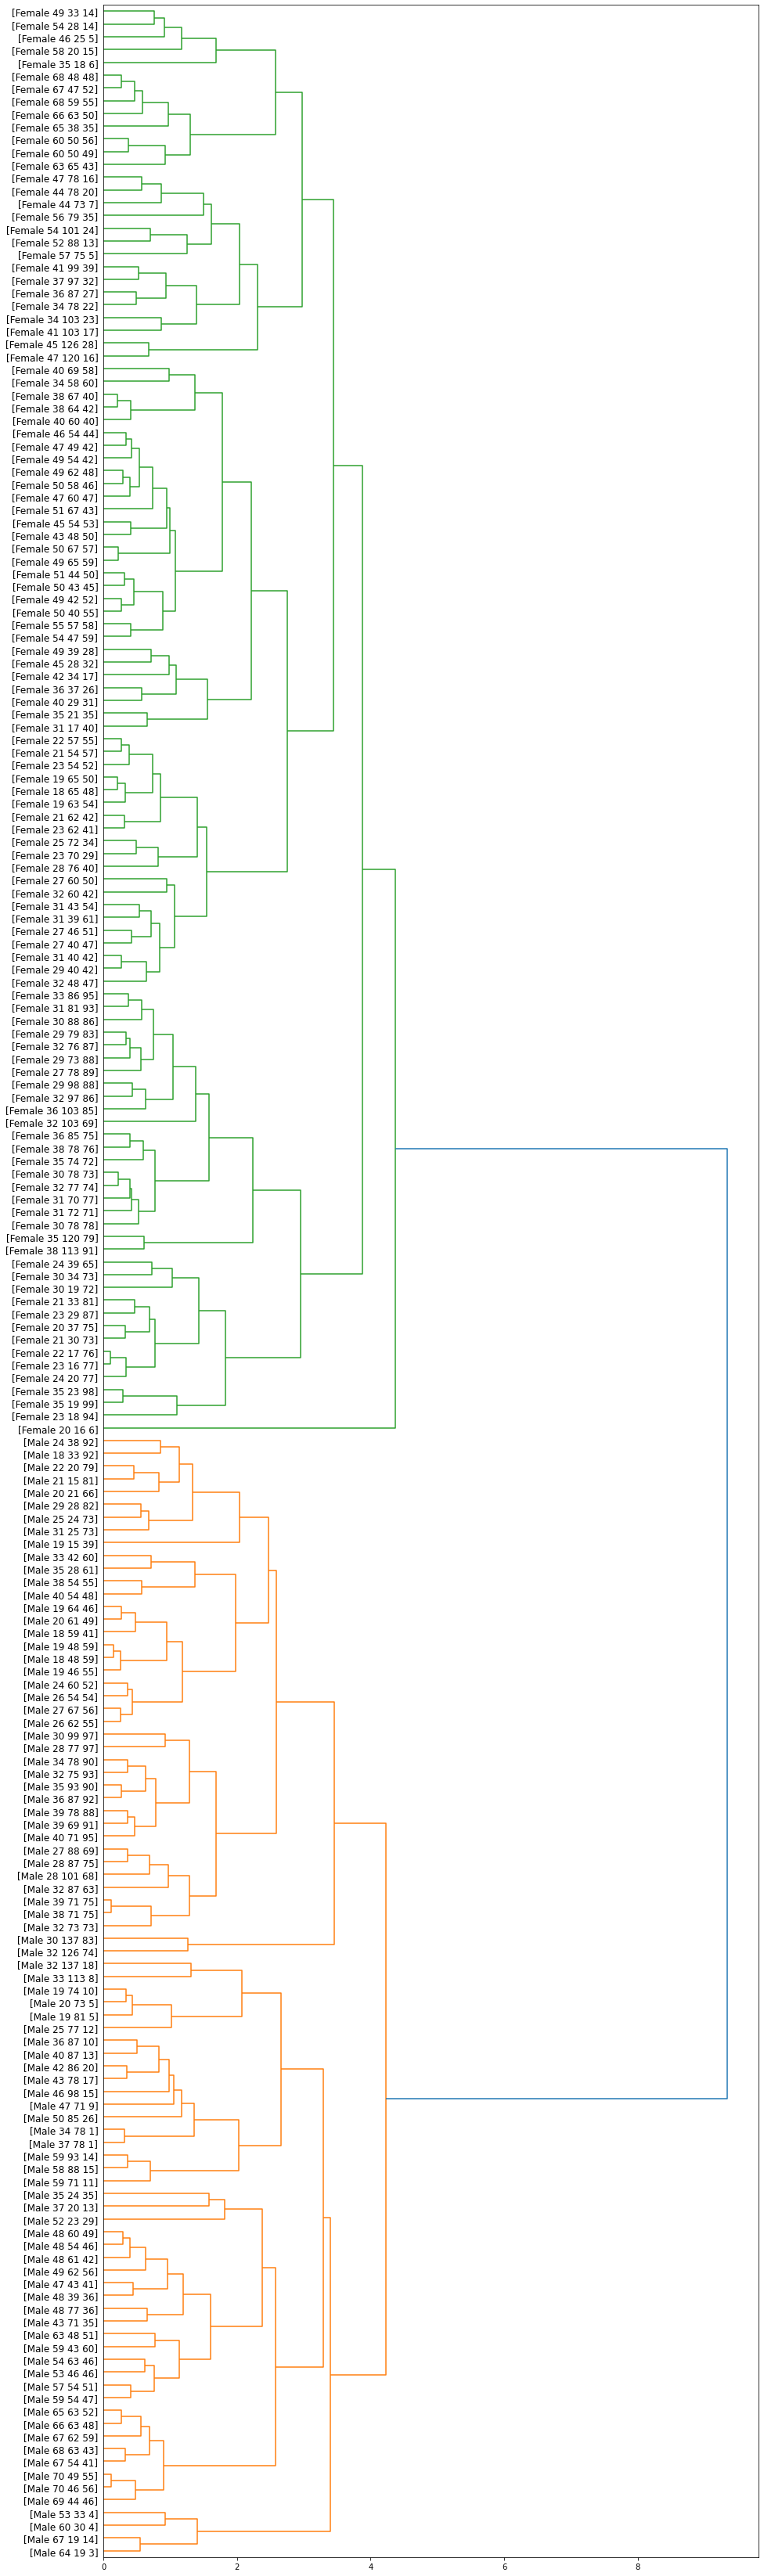

In [371]:
fig=plt.figure(figsize=(15,60))
dendro=hierarchy.dendrogram(Z, leaf_label_func=llf, orientation='right', leaf_font_size=12)

In [372]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
labels = fcluster(Z, max_d, criterion='distance')
labels

array([1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1], dtype=int32)

In [373]:
df['label_']=labels
groups=df.groupby(['label_','Gender']).mean()
groups

,,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
label_,Gender,,,,
1,Male,104.238636,39.806818,62.227273,48.511364
2,Female,97.562500,38.098214,59.250000,51.526786


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


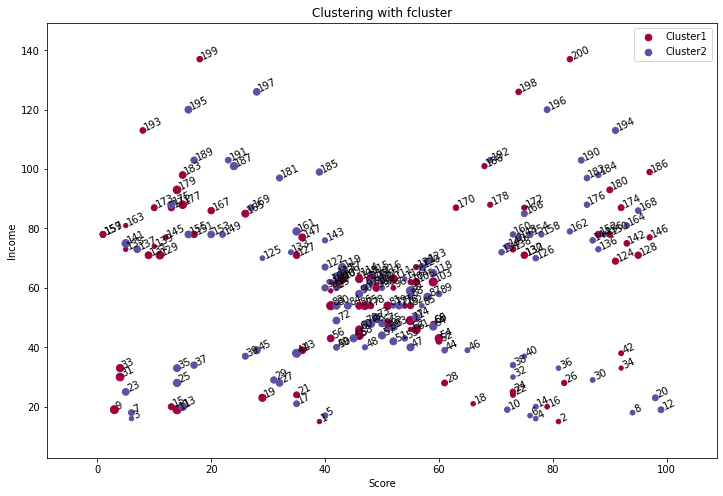

In [374]:
plot_individual_cluster(df, labels, 'fcluster')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


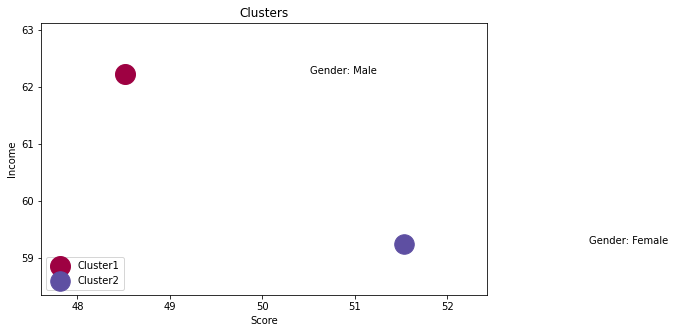

In [375]:
plot_group_cluster(groups, labels)

In [376]:
silhouette_score(X, labels)

0.5194624832665107

In [377]:
agglom=AgglomerativeClustering(n_clusters=4, linkage='complete')
agglom.fit(X)
labels=agglom.labels_

C:\Users\pc\AppData\Local\Temp\ipykernel_4652\387415754.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(dis, 'complete')


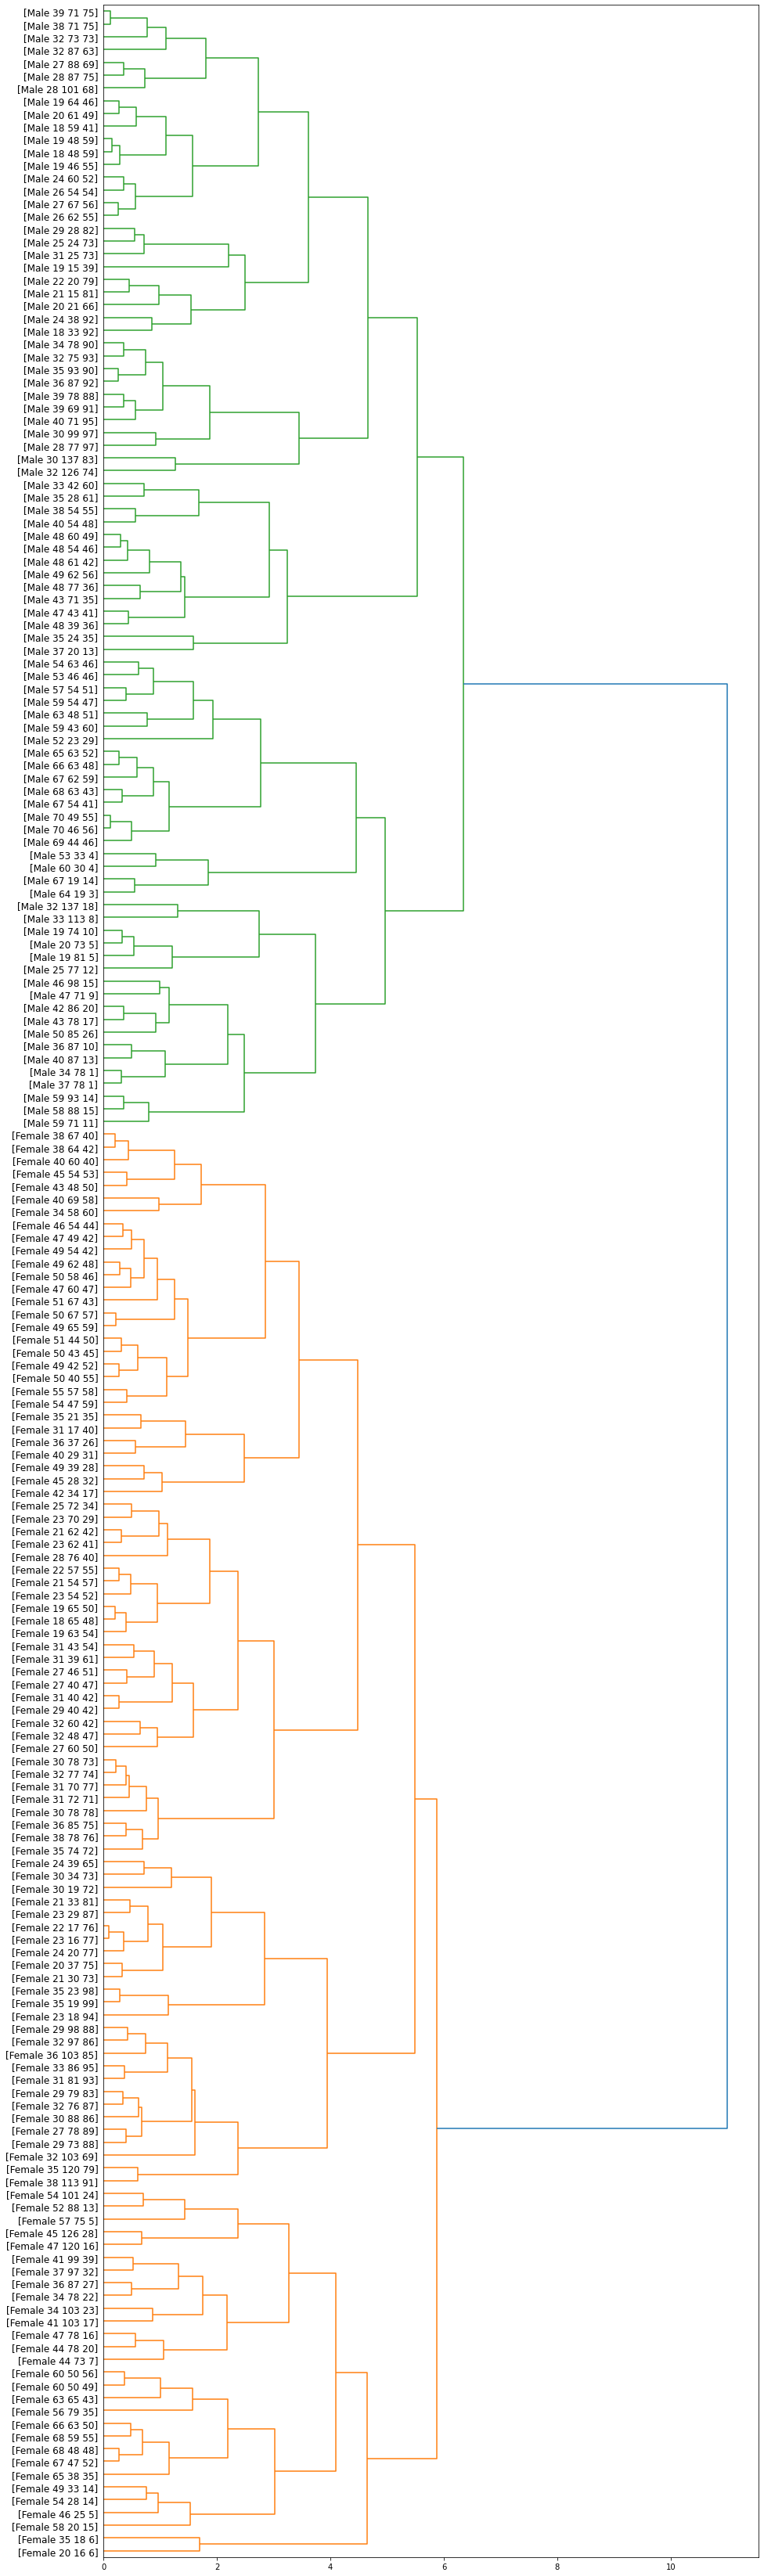

In [378]:
Z=hierarchy.linkage(dis, 'complete')
fig=plt.figure(figsize=(15,60))
dendro=hierarchy.dendrogram(Z, leaf_label_func=llf, orientation='right', leaf_font_size=12)

In [379]:
df['label_']=labels
groups=df.groupby(['label_','Gender']).mean()
groups

,,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
label_,Gender,,,,
0,Male,116.320755,29.245283,67.603774,57.264151
1,Female,92.320513,41.794872,57.628205,38.576923
2,Male,85.942857,55.800000,54.085714,35.257143
3,Female,109.588235,29.617647,62.970588,81.235294


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

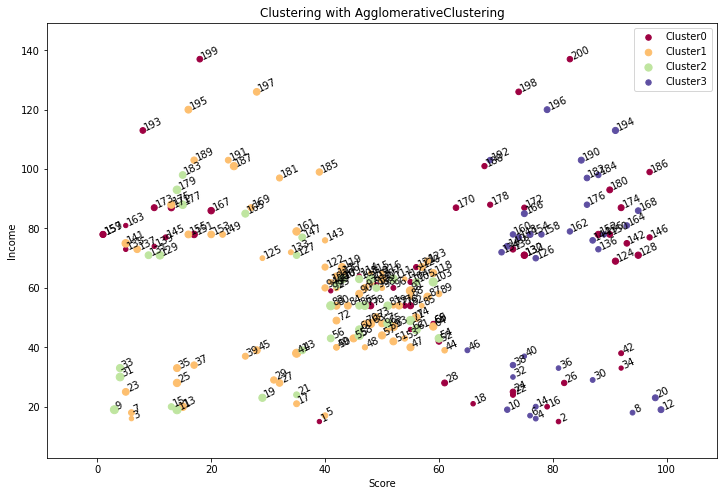

In [380]:
plot_individual_cluster(df, labels, 'AgglomerativeClustering')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

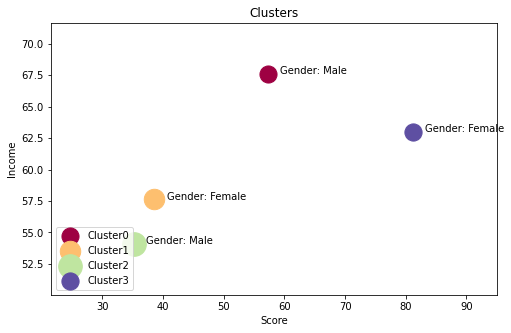

In [381]:
plot_group_cluster(groups, labels)

In [382]:
silhouette_score(X, labels)

0.3190525844318978

## 3 - DBSCAN

In [383]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

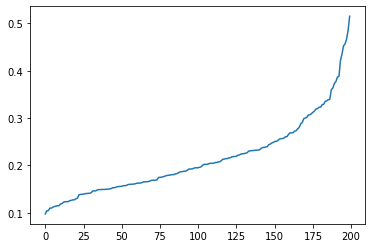

In [384]:
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.plot(distances)

In [385]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3, min_samples=8)
db.fit(X)
labels=db.labels_
labels

array([ 0,  0, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0, -1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1], dtype=int64)

In [386]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

2

In [387]:
df['label_']=labels

In [388]:
df.label_.value_counts()

 1    111
 0     80
-1      9
Name: label_, dtype: int64

In [389]:
groups=df.groupby(['label_','Gender']).mean()
groups

CustomerID        Age  Annual Income (k$)  \
label_ Gender                                              
-1     Female    3.000000  20.000000            16.00000   
       Male     79.625000  45.250000            58.62500   
 0     Male    106.700000  39.262500            62.58750   
 1     Female   98.414414  38.261261            59.63964   

               Spending Score (1-100)  
label_ Gender                          
-1     Female                6.000000  
       Male                 18.625000  
 0     Male                 51.500000  
 1     Female               51.936937

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


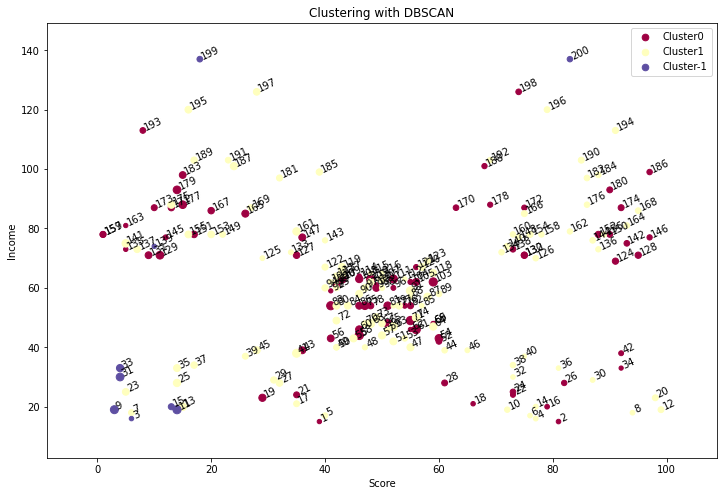

In [390]:
plot_individual_cluster(df, labels, 'DBSCAN')
#cluster -1 means outliers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


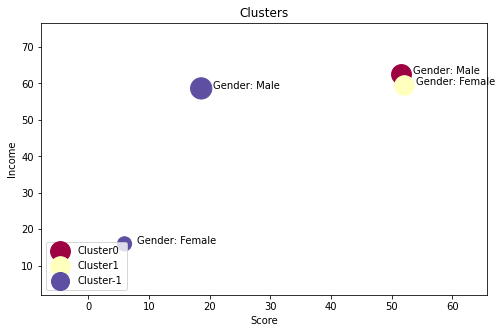

In [391]:
plot_group_cluster(groups, labels)

In [392]:
silhouette_score(X, labels)

0.41437110345962025